## Problem Statement

In [2]:
# Dataset contains 6819 firm's and 95 features of each firm. Features include firm's assets, liabilities, shares,debt,etc.
# Using the given historical data, Create a classification model to predict whether the firm is bankrupted or not.
# Bankruptcy actually means increasing interest to firms that stands to lose money because of unpaid debts.

In [55]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys,warnings
import sweetviz as sv
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report


warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [56]:
os.getcwd()

'C:\\Users\\ashokakm\\Music\\Learnbay Learning\\Interview Project'

In [57]:
# Importing the data

df = pd.read_csv('BANKRUPTCY PREDICTION.csv')

In [58]:
# Setting option to display all columns in the dataset

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [59]:
# Displaying top 5 records

df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256970e-04   
1                               0.781506             2.897850e-04   
2                               0.780284             2.361300e-04   
3                               0.781241             1.078890e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

In [60]:
# Shape of dataset
df.shape

(6819, 95)

In [61]:
# Displaying the structure of dataset
# All values are numerical
# Except 2 features, rest are continuous values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [62]:
# Describing the dataset for mean,median, lowest, highest values

df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781567             1.5668

In [63]:
# NUll value check
# No null values in the dataset

df.isnull().sum().sum()

0

In [64]:
# Highly imbalanced dataset

df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

In [65]:
# Minroty class is 3.23% of total dataset

print('Percentage of firms Bankrupt',round(df['Bankrupt'].value_counts()[1]*100/len(df['Bankrupt']),2),'%')
print('Percentage of firms Non-Bankrupt',round(df['Bankrupt'].value_counts()[0]*100/len(df['Bankrupt']),2),'%')

Percentage of firms Bankrupt 3.23 %
Percentage of firms Non-Bankrupt 96.77 %


## Exploratory Data Analysis

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

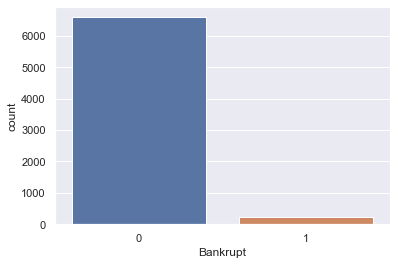

In [66]:
# Plotting the dependent varaible class distribution
# 0 class is higher
# Number of bankrupt firms are lesser
# We need to use resampling techniques to deliver high accuarcy

sns.countplot(df['Bankrupt'])

<AxesSubplot:>

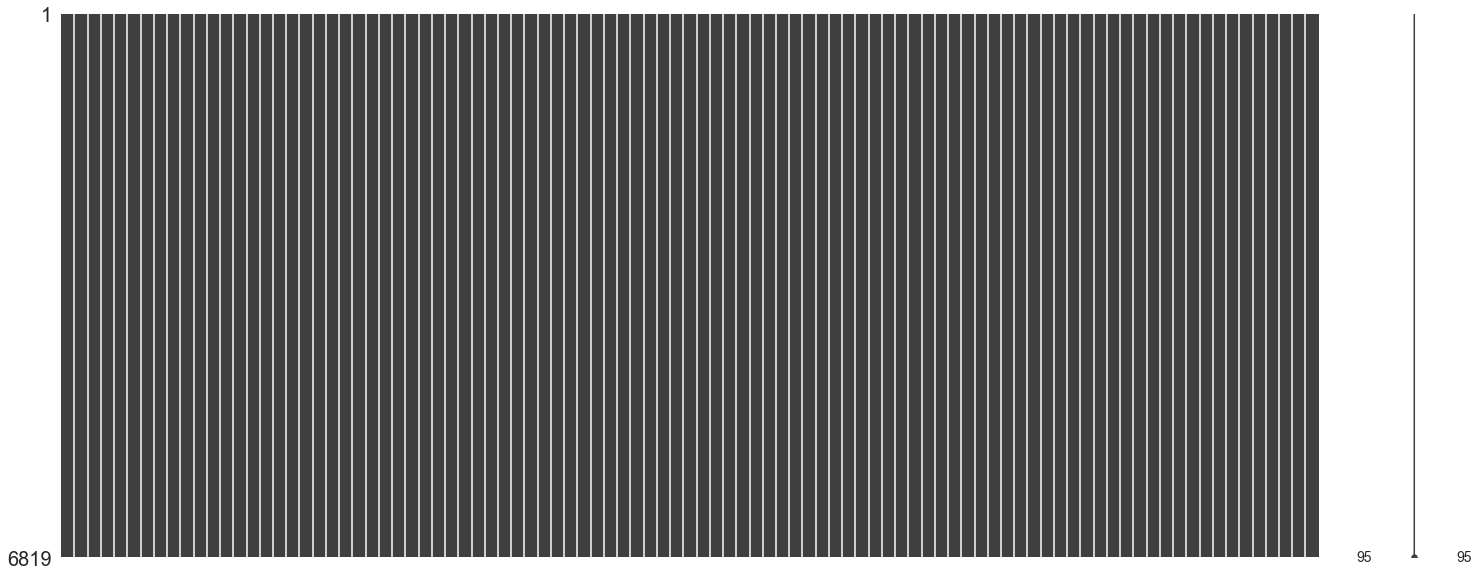

In [67]:
# No missing values 

import missingno as mn
mn.matrix(df)

In [68]:
# Correlation check

corr = df.corr(method='spearman')

<AxesSubplot:>

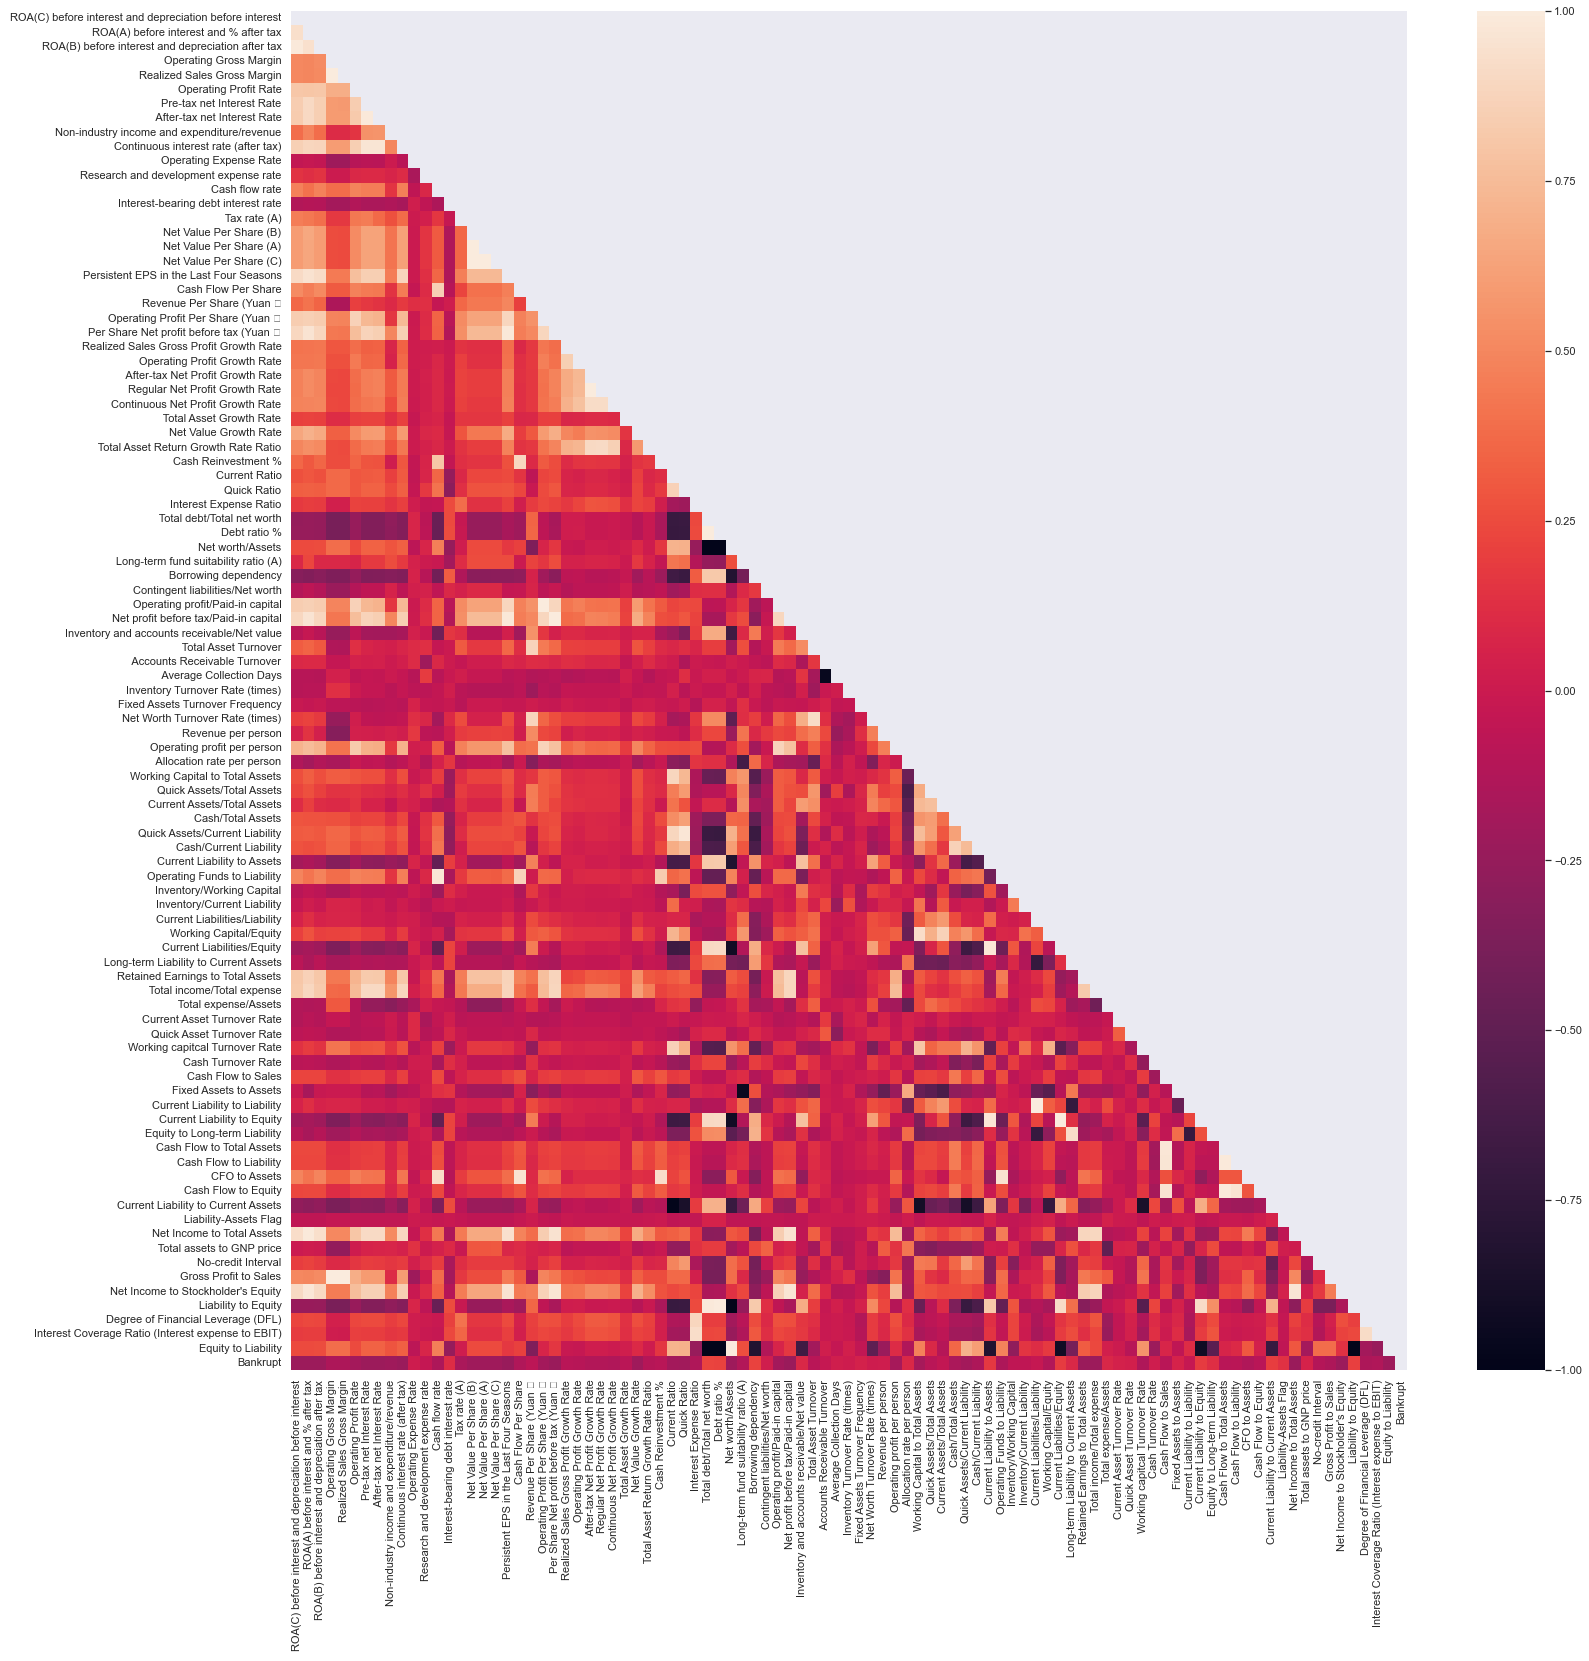

In [69]:
# Using heatmap to check correlation
# White box and black box represents strong correlation
# We can find the high correlation exists between multiple independent variables but correlation between all the 
# independent variables and dependent variables are very less

plt.figure(figsize=(25,25))
sns.heatmap(corr,xticklabels= df.columns,yticklabels=df.columns,mask =np.triu(np.ones_like(corr,dtype=bool),k=0))

In [70]:
# Visualizing correlation values

corr.style.background_gradient(cmap='coolwarm')

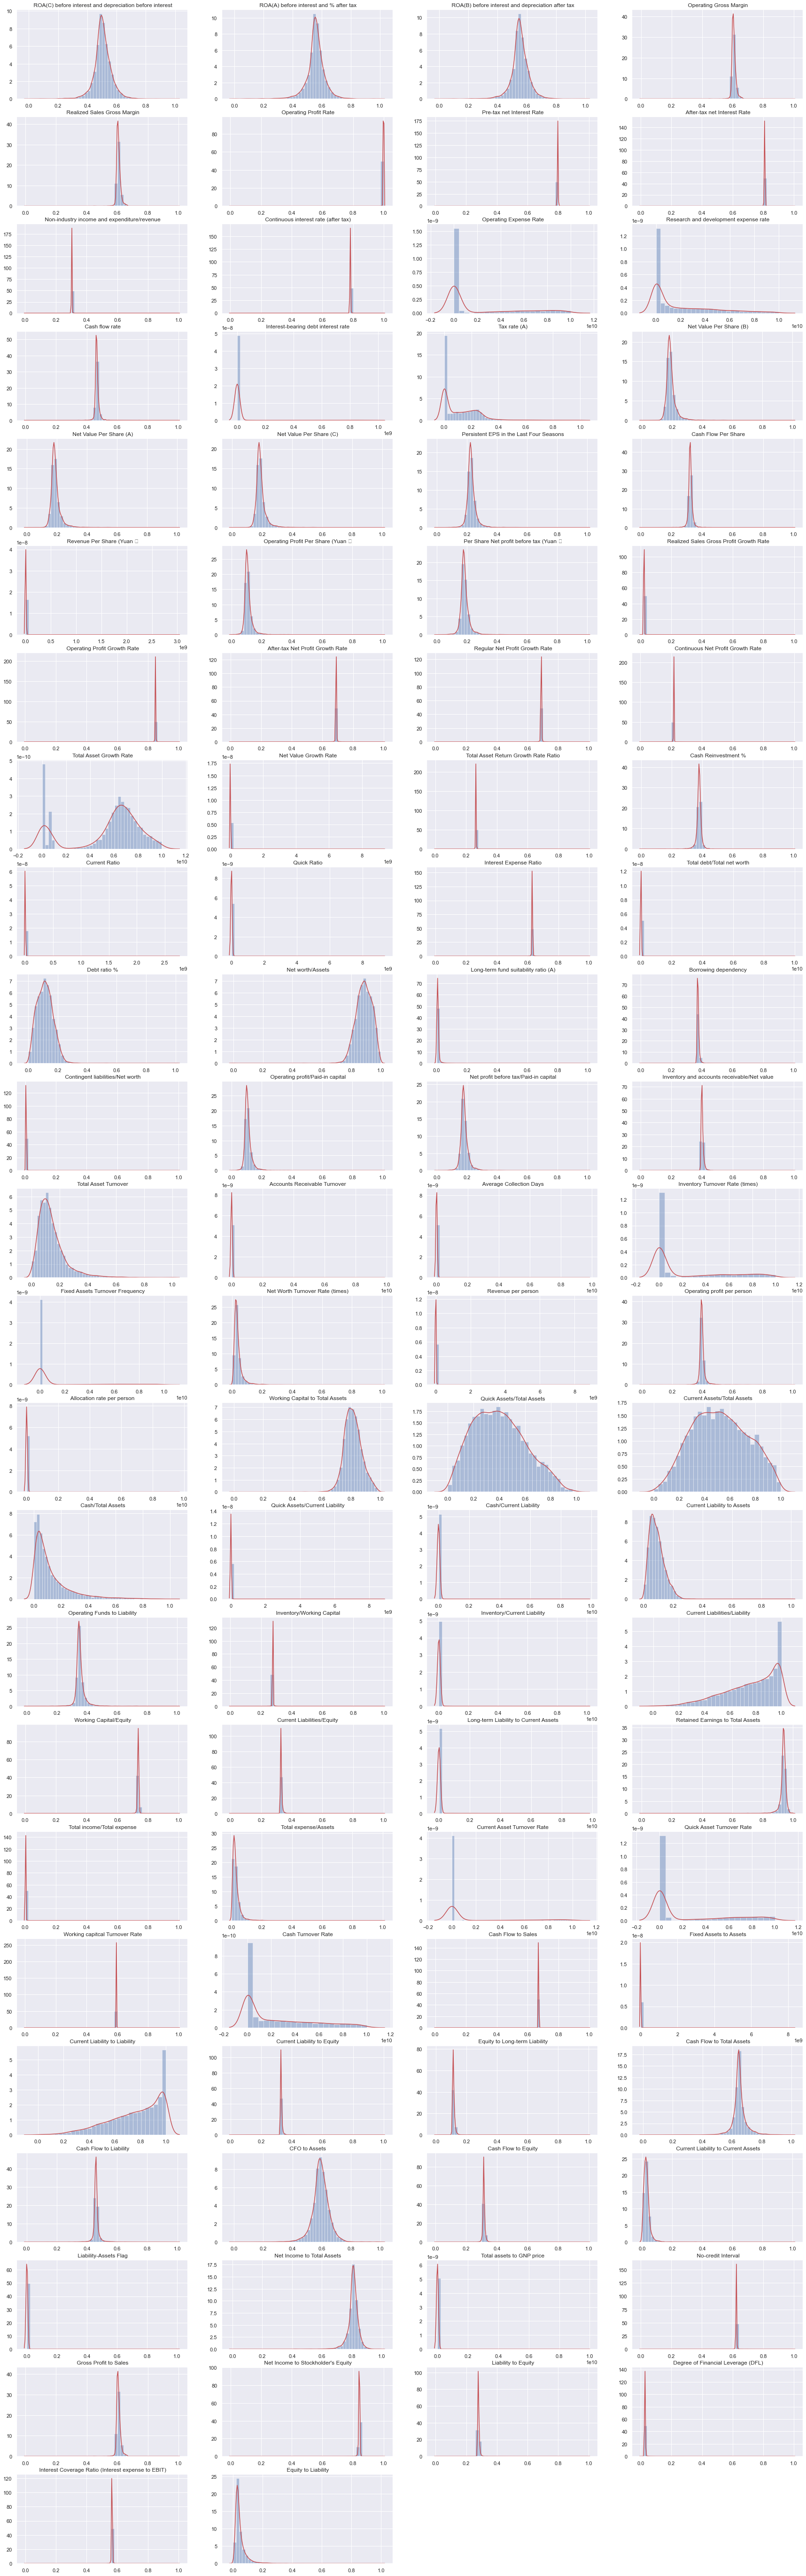

In [71]:
# Visualing the distribution of the data using distplot

plt.figure(figsize = (30,100))
plot =1
for i in df.columns:
    if i == 'Bankrupt':
        break
    plt.subplot(24,4,plot)
    sns.distplot(a=df[i],kde_kws={'color':'r'})
    plt.title(i)
    plt.xlabel(None)
    plt.ylabel(None)
    plot+=1
plt.show()

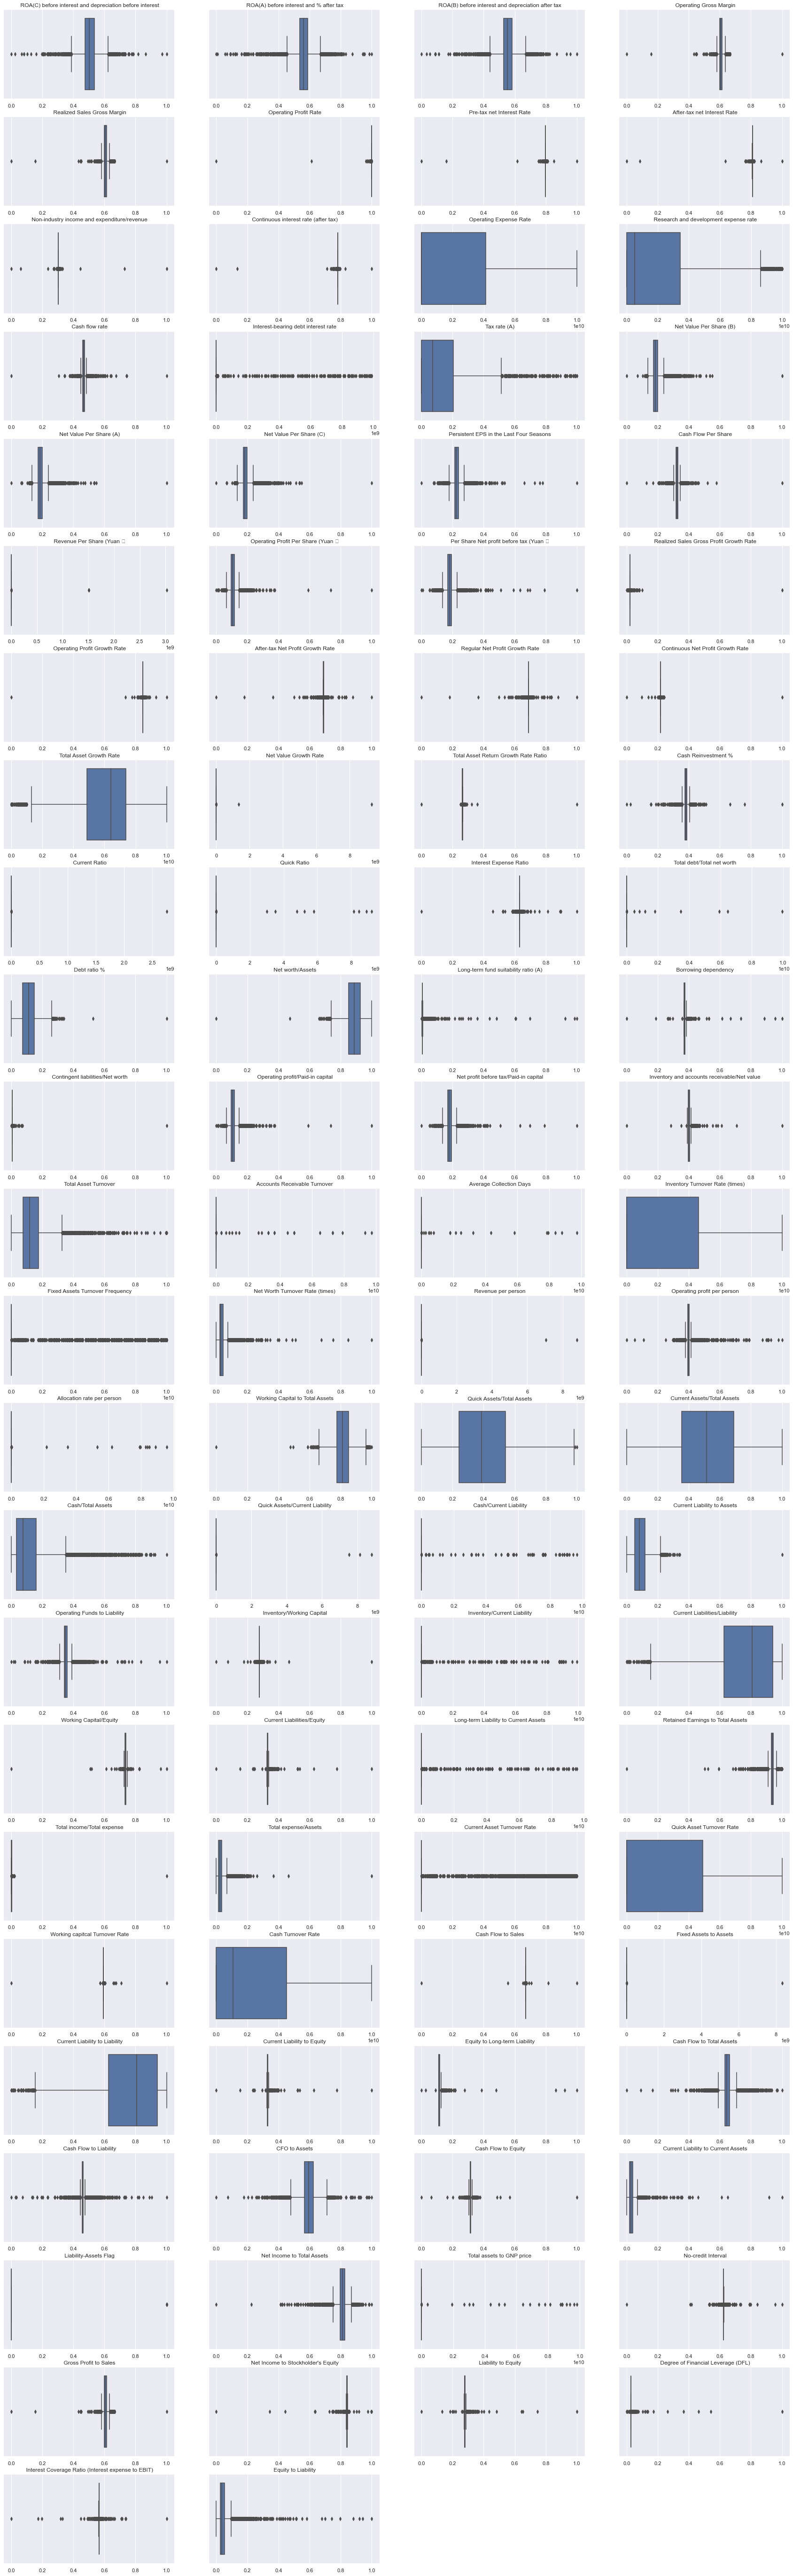

In [72]:
# Box plot representation of all the features
# Shows the 5 number summary - min, max, median, 1st  and 3rd quartile with respect to
# bankrupt and non-bankrupt firms
# Visualize the distribution of data and detect outliers

plt.figure(figsize = (30,100))
plot = 1
for i in df.columns:
    if i == 'Bankrupt':
        break
    plt.subplot(24,4,plot)
    sns.boxplot(x=i,data=df)
    plt.title(i)
    plt.xlabel(None)
    plt.ylabel(None)
    plot+=1
    
plt.show()

## Feature Importance


In [76]:
# To find the important features in the dataset. We are finding the correlation of all the independent variables to the
# dependent variable. This correlation explains how the respective predictor variable effective in making the target as 1.
# All the predictor variable column names are stored in to a variable

predictor = df.iloc[:,:-1].columns

In [89]:
# Top 20 positively and negatively correlated columns to target variable are taken out and stored in the list  

positive_corr_target = df[predictor].corrwith(df['Bankrupt']).sort_values(ascending=False)[:20].index.to_list()
negative_corr_target = df[predictor].corrwith(df['Bankrupt']).sort_values()[:20].index.to_list()

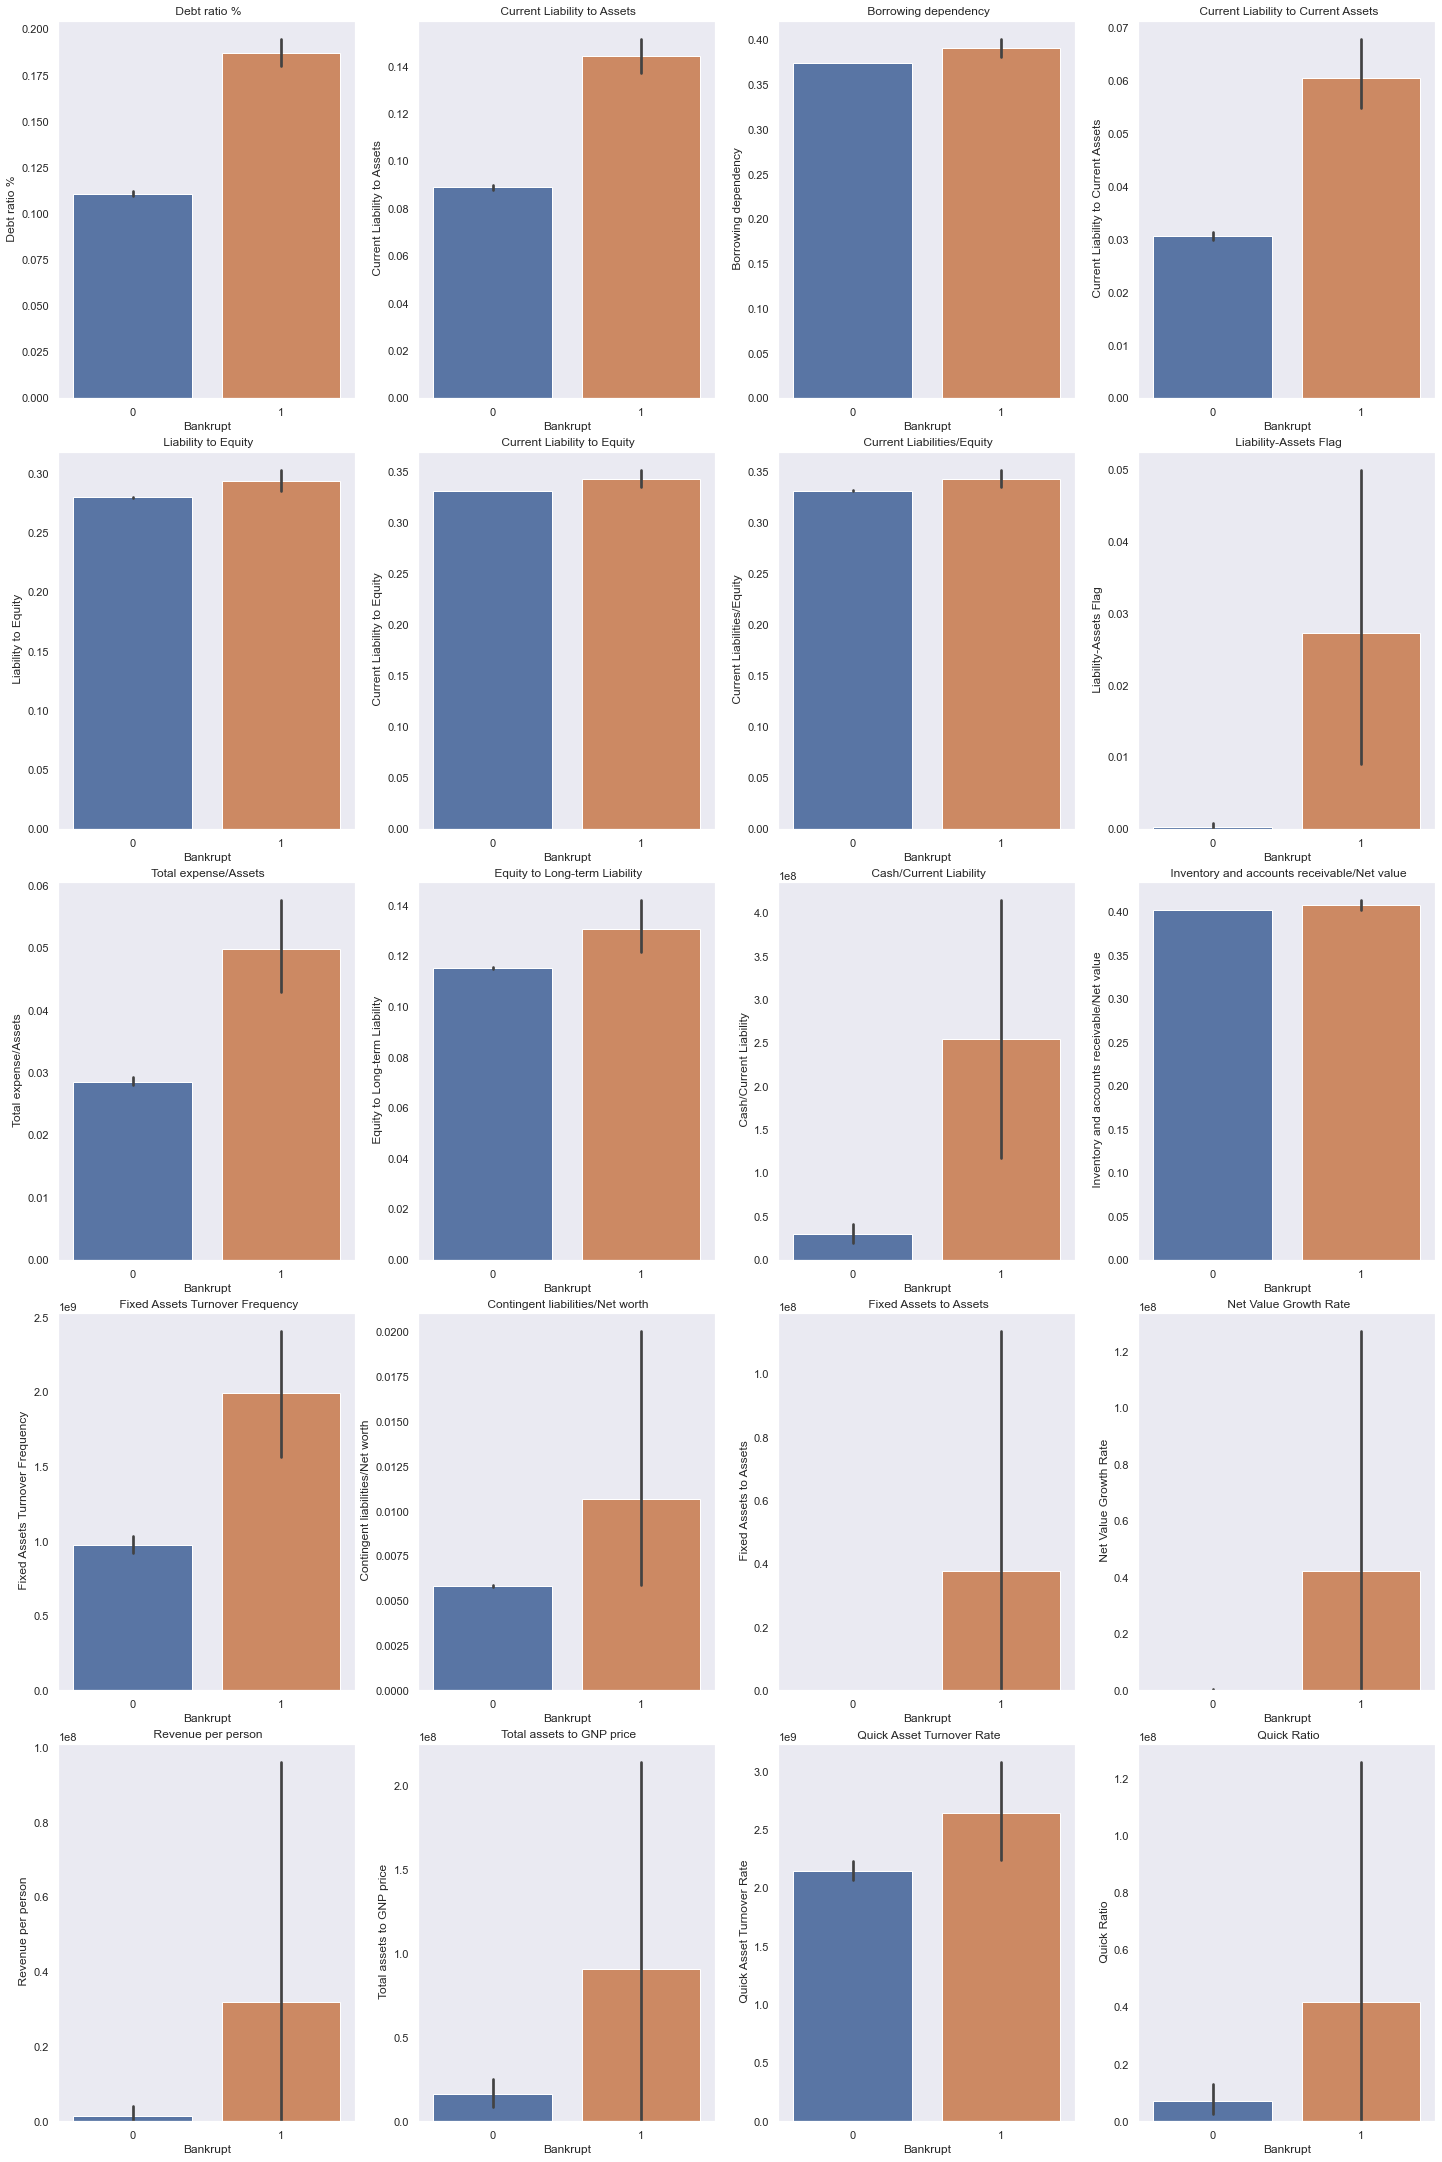

In [90]:
# Plotting top 20 important features havign high positive correlation with target variable
# Below listed important variables have high impact on making the target variable as 1

# Debt ratio, current liability to assets, current liability to current assets, Liability-Assets flag, Total Expense/Assets,
# Cash/current liability, Fixed assets turnover Frequency, contingent liabilities/net worth, Fixed Assets to Assets,
# Net value growth rate, Revenue per person, Total assets to GNP price, Quick ratio

# The above mentioned variables have strong impact on the target variables. Higher proportion of these individual variables
# means higher the chance of firms turning out to be bankrupt.

# Out of all the important variables, Liability-Assets flag, Fixed Assets to Assets, Net value growth rate,
# Revenue per person variables have higher probability to make the target as 1.

plot=1
plt.figure(figsize=(20,30))
for i in positive_corr_target:
    plt.subplot(5,4,plot)
    sns.barplot(x = 'Bankrupt',y=i,data=df)
    plt.title(i)
    plt.grid(False)
    plot+=1
plt.tight_layout(pad=0.5)
plt.show()

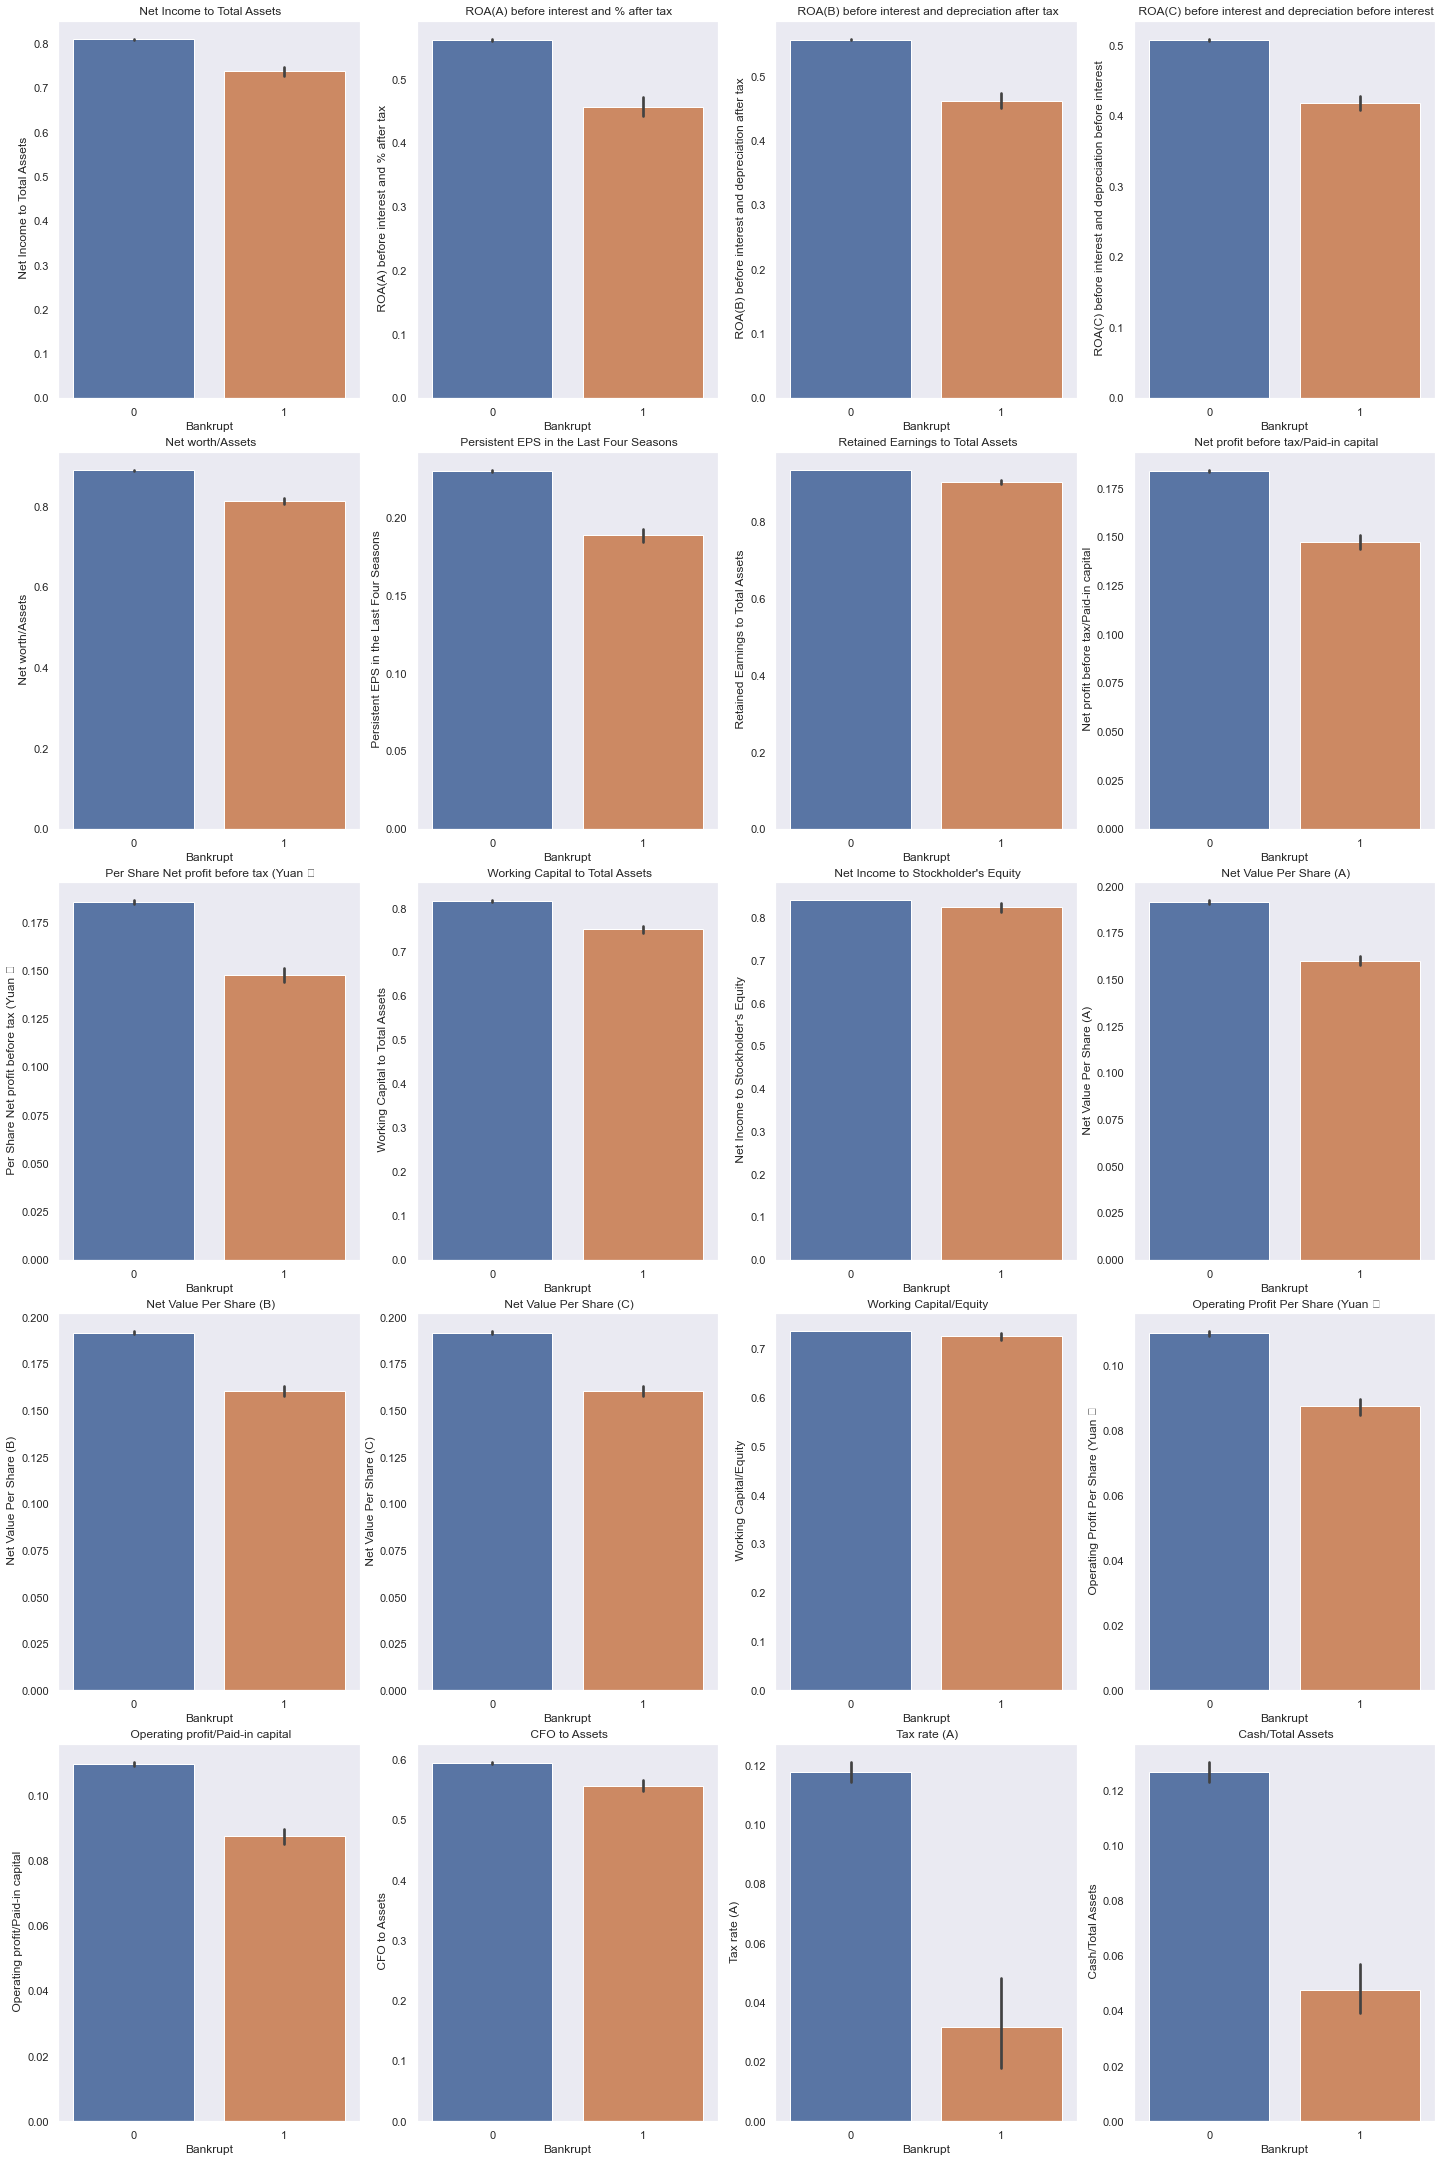

In [91]:
# Plotting top 20 important features having high negative correlation with target variable

plot=1
plt.figure(figsize=(20,30))
for i in negative_corr_target:
    plt.subplot(5,4,plot)
    sns.barplot(x = 'Bankrupt',y=i,data=df)
    plt.title(i)
    plt.grid(False)
    plot+=1
plt.tight_layout(pad=0.5)
plt.show()

## Data Preprocessing

### Zero Variance check 

In [80]:
# No zero variance features are present

df.var().isnull().sum()

0

### Correlation

In [81]:
# Creating dataframe where correlation values of the dataframe below the diagonal is made null

corr1= corr.where(np.triu(np.ones_like(corr,dtype=bool),k=1))

In [82]:
corr1

ROA(C) before interest and depreciation before interest  \
 ROA(C) before interest and depreciation before...                                                NaN          
 ROA(A) before interest and % after tax                                                           NaN          
 ROA(B) before interest and depreciation after tax                                                NaN          
 Operating Gross Margin                                                                           NaN          
 Realized Sales Gross Margin                                                                      NaN          
 Operating Profit Rate                                                                            NaN          
 Pre-tax net Interest Rate                                                                        NaN          
 After-tax net Interest Rate                                                                      NaN          
 Non-industry income and expenditure/revenue                                                      NaN          
 Continuous interest rate (after tax)                                                             NaN          
 Operating Expense Rate                                                                           NaN          
 Research and development expense rate                                                            NaN          
 Cash flow rate                                                                                   NaN          
 Interest-bearing debt interest rate                                                              NaN          
 Tax rate (A)                                                                                     NaN          
 Net Value Per Share (B)                                                                          NaN          
 Net Value Per Share (A)                                                                          NaN          
 Net Value Per Share (C)                                                                          NaN          
 Persistent EPS in the Last Four Seasons                                                          NaN          
 Cash Flow Per Share                                                                              NaN          
 Revenue Per Share (Yuan �                                                                        NaN          
 Operating Profit Per Share (Yuan �                                                               NaN          
 Per Share Net profit before tax (Yuan �                                                          NaN          
 Realized Sales Gross Profit Growth Rate                                                          NaN          
 Operating Profit Growth Rate                                                                     NaN          
 After-tax Net Profit Growth Rate                                                                 NaN          
 Regular Net Profit Growth Rate                                                                   NaN          
 Continuous Net Profit Growth Rate                                                                NaN          
 Total Asset Growth Rate                                                                          NaN          
 Net Value Growth Rate                                                                            NaN          
 Total Asset Return Growth Rate Ratio                                                             NaN          
 Cash Reinvestment %                                                                              NaN          
 Current Ratio                                                                                    NaN          
 Quick Ratio                                                                                      NaN          
 Interest Expense Ratio                                                                           NaN          
 Total debt/Total net

In [84]:
df.columns.shape

(95,)

In [116]:
# Using the correlation dataframe to check for the highly inversely correlated columns <=-0.9

negative_corr = [column for column in corr1.columns if any(corr1[column] <=-0.9)]

In [111]:
# Using the correlation dataframe to check for the highly positive correlated columns >0.9

positive_corr = [column for column in corr1.columns if any(corr1[column] >0.9)]

In [96]:
# creating a copy of the dataset
df1 = df.copy()

In [117]:
# Checking if highly negative correlated columns are part of important variables, if so remove them from the correlation
# list

negative_corr1=[]
for i in negative_corr:
    if i not in negative_corr_target:
        if i not in positive_corr_target:
            negative_corr1.append(i)
print(negative_corr1)

[' Average Collection Days', ' Equity to Liability']


In [114]:
# Checking if highly positive correlated columns are part of important variables, if so remove them from the correlation
# list

positive_corr1=[]
for i in positive_corr:
    if i not in negative_corr_target:
        if i not in positive_corr_target:
            positive_corr1.append(i)
print(positive_corr1)

[' Realized Sales Gross Margin', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Net Worth Turnover Rate (times)', ' Quick Assets/Current Liability', ' Operating Funds to Liability', ' Total income/Total expense', ' Current Liability to Liability', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' Cash Flow to Equity', ' Gross Profit to Sales', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Equity to Liability']


In [118]:
# Checking if high negatively correlated column is also present in positive correlation list and remove them

negative_corr2=[]
for i in negative_corr1:
    if i not in positive_corr1:
        negative_corr2.append(i)
print(negative_corr2)

[' Average Collection Days']


In [119]:
# Dropping positive correlated columns
df1 = df1.drop(columns=(positive_corr))

In [121]:
# Dropping neatively correlated columns
df1 = df1.drop(columns=(negative_corr2))

In [123]:
# By dropping off strongl correlated columns, we can reduce redundancy, overfitting and 
# improve model robustness


df1.shape

(6819, 60)

### Outliers

In [124]:
# There are outliers in few variables.
# Since we are working on a financial dataset,the outliers could be important data points, removing or imputing it could 
# eliminate the key information from the dataset
# To overcome this issue, we are not removing the outliers, instead we use robust scaler technique which is based on 
# interquartile range. It rescales the feature values by subtracting the lower quartile and dividing by the interquartile 
# range, making it suitable for datasets with extreme values.


df1.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        Operating Gross Margin   Operating Profit Rate  \
count              6819.000000             6819.000000   
mean                  0.607948                0.998755   
std                   0.016934                0.013010   
min                   0.000000                0.000000   
25%                   0.600445                0.998969   
50%                   0.605997                0.999022   
75%                   0.613914                0.999095   
max                   1.000000                1.000000   

        Pre-tax net Interest Rate  \
count                 6819.000000   
mean                     0.797190   
std                      0.012869   
min                      0.000000   
25%                      0.797386   
50%                      0.797464   
75%                      0.797579   
max                      1.000000   

        Non-industry income and expenditure/revenue   Operating Expense Rate  \
count                                   6819.000000             6.819000e+03   
mean                                       0.303623             1.995347e+09   
std                                        0.011163             3.237684e+09   
min                                        0.000000             0.000000e+00   
25%                                        0.303466             1.566870e-04   
50%                                        0.303525             2.777590e-04   
75%                                        0.303585             4.145000e+09   
max                                        1.000000             9.990000e+09   

        Research and development expense rate   Cash flow rate  \
count                            6.819000e+03      6819.000000   
mean                             1.950427e+09         0.467431   
std                              2.598292e+09         0.017036   
min                              0.000000e+00         0.000000   
25%                              1.281880e-04         0.461558   
50%                              5.090000e+08         0.465080   
75%                              3.450000e+09         0.471004   
max                              9.980000e+09         1.000000   

        Interest-bearing debt interest rate   Tax rate (A)  \
count                          6.819000e+03    6819.000000   
mean                           1.644801e+07       0.115001   
std                            1.082750e+08       0.138667   
min                            0.000000e+00       0.000000   
25%                            2.030200e-04       0.000000   
50%                            3.210320e-04       0.073489   
75%                            5.325530e-04       0.205841   
max                            9.900000e+08       1.000000   

        Net Value Per Share (B)   Cash Flow Per Share  \
count               6819.000000           6819.000000   
mean                   0.190661              0.323482   
std                    0.033390              0.017611   
min                    0.000000              0.000000   
25%                    0.173613              0.317748   
50%                    0.184400              0.322487   
75%                    0.199570              0.328623   
max                    1.000000              1.000000   

        Revenue Per Share (Yuan �   Operating Profit Per Share (Yuan �  \
count                6.819000e+03                          6819.000000   
mean      

### Duplicate rows check

In [125]:
# No duplicate rows in the dataset

df1.duplicated().sum()

0

## Feature Selection

In [126]:
# Spliting independent and dependent variables

x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [127]:
# Training and testing dataset is splitted by applying the train test split method
# Stratified sampling is done to take equal proportion of samples from minority and majority class for training and testing
# test sample size is 20%
# Scaling is done after splitting testing data avoid data leakage

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 101, stratify=y)

## Feature Scaling

In [128]:
# Using Robust scaler technique to handle the outliers
# creating scaler object


scaler = RobustScaler()

In [129]:
# Training and testing dataset is scaled separately to avoid data leakage

x_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns = x.columns)

## SMOTE

In [130]:
# Resampling the training dataset using SMOTE technique to create synthetic values to level the minority class to 
# majority class

smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x_train,y_train)

## Borderline SMOTE

In [131]:
# Resampling the training dataset using Borderline SMOTE technique

border = BorderlineSMOTE()
x_border,y_border = border.fit_resample(x_train,y_train)

## Model Selection

In [132]:
# To create the model, all the classifiers are put into a list

classifier = [DecisionTreeClassifier(),RandomForestClassifier(),BaggingClassifier(),LogisticRegression(),
SVC(),XGBClassifier(),KNeighborsClassifier(),CatBoostClassifier(),AdaBoostClassifier()]

In [133]:
# Looped through the classifier list and each model is created, trained and evaluted separately.
# We have used the synthetic over sampled dataset
# Since the dataset is imbalanced, we need to look into precision and recall for evaluation in addition to accuracy score
# Hence, we consider the model with high recall and high roc auc score

for i in classifier:
    i.fit(x_smote,y_smote)
    pred = i.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    print('Classifier:',i)
    print('Training Score is: ',i.score(x_smote,y_smote))
    print('Testing score is: ',round(accuracy,3))
    print('roc auc score: ',round(roc_auc_score(y_test,pred),3))
    print('\n')
    print('Classification report: ')
    print(classification_report(y_test,pred))
    print('**************************************'*3)

Classifier: DecisionTreeClassifier()
Training Score is:  1.0
Testing score is:  0.929
roc auc score:  0.634


Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1320
           1       0.17      0.32      0.22        44

    accuracy                           0.93      1364
   macro avg       0.57      0.63      0.59      1364
weighted avg       0.95      0.93      0.94      1364

******************************************************************************************************************
Classifier: RandomForestClassifier()
Training Score is:  1.0
Testing score is:  0.959
roc auc score:  0.704


Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.38      0.43      0.40        44

    accuracy                           0.96      1364
   macro avg       0.68      0.70      0.69      1364
weighted avg      

70:	learn: 0.1509053	total: 1.15s	remaining: 15.1s
71:	learn: 0.1494689	total: 1.17s	remaining: 15.1s
72:	learn: 0.1480331	total: 1.18s	remaining: 15s
73:	learn: 0.1464877	total: 1.2s	remaining: 15s
74:	learn: 0.1454205	total: 1.21s	remaining: 15s
75:	learn: 0.1444220	total: 1.23s	remaining: 14.9s
76:	learn: 0.1435081	total: 1.24s	remaining: 14.9s
77:	learn: 0.1425139	total: 1.26s	remaining: 14.9s
78:	learn: 0.1412196	total: 1.27s	remaining: 14.8s
79:	learn: 0.1401116	total: 1.29s	remaining: 14.8s
80:	learn: 0.1392482	total: 1.3s	remaining: 14.8s
81:	learn: 0.1383648	total: 1.32s	remaining: 14.7s
82:	learn: 0.1373726	total: 1.33s	remaining: 14.7s
83:	learn: 0.1362897	total: 1.34s	remaining: 14.7s
84:	learn: 0.1353528	total: 1.36s	remaining: 14.6s
85:	learn: 0.1345794	total: 1.37s	remaining: 14.6s
86:	learn: 0.1339875	total: 1.39s	remaining: 14.6s
87:	learn: 0.1332597	total: 1.4s	remaining: 14.5s
88:	learn: 0.1323772	total: 1.42s	remaining: 14.5s
89:	learn: 0.1318547	total: 1.43s	remain

231:	learn: 0.0672937	total: 4.28s	remaining: 14.2s
232:	learn: 0.0669621	total: 4.29s	remaining: 14.1s
233:	learn: 0.0666007	total: 4.31s	remaining: 14.1s
234:	learn: 0.0662925	total: 4.33s	remaining: 14.1s
235:	learn: 0.0659733	total: 4.34s	remaining: 14.1s
236:	learn: 0.0656045	total: 4.36s	remaining: 14s
237:	learn: 0.0653154	total: 4.38s	remaining: 14s
238:	learn: 0.0650462	total: 4.39s	remaining: 14s
239:	learn: 0.0648811	total: 4.41s	remaining: 14s
240:	learn: 0.0645702	total: 4.42s	remaining: 13.9s
241:	learn: 0.0644065	total: 4.44s	remaining: 13.9s
242:	learn: 0.0642217	total: 4.46s	remaining: 13.9s
243:	learn: 0.0639899	total: 4.47s	remaining: 13.9s
244:	learn: 0.0637243	total: 4.49s	remaining: 13.8s
245:	learn: 0.0634681	total: 4.51s	remaining: 13.8s
246:	learn: 0.0631959	total: 4.52s	remaining: 13.8s
247:	learn: 0.0629909	total: 4.54s	remaining: 13.8s
248:	learn: 0.0628024	total: 4.55s	remaining: 13.7s
249:	learn: 0.0625105	total: 4.57s	remaining: 13.7s
250:	learn: 0.062331

390:	learn: 0.0395678	total: 7.35s	remaining: 11.5s
391:	learn: 0.0394223	total: 7.37s	remaining: 11.4s
392:	learn: 0.0392248	total: 7.39s	remaining: 11.4s
393:	learn: 0.0391248	total: 7.41s	remaining: 11.4s
394:	learn: 0.0390266	total: 7.43s	remaining: 11.4s
395:	learn: 0.0389592	total: 7.45s	remaining: 11.4s
396:	learn: 0.0388695	total: 7.46s	remaining: 11.3s
397:	learn: 0.0387142	total: 7.48s	remaining: 11.3s
398:	learn: 0.0386482	total: 7.5s	remaining: 11.3s
399:	learn: 0.0385800	total: 7.52s	remaining: 11.3s
400:	learn: 0.0384078	total: 7.54s	remaining: 11.3s
401:	learn: 0.0383338	total: 7.55s	remaining: 11.2s
402:	learn: 0.0382267	total: 7.57s	remaining: 11.2s
403:	learn: 0.0381144	total: 7.59s	remaining: 11.2s
404:	learn: 0.0379047	total: 7.61s	remaining: 11.2s
405:	learn: 0.0377802	total: 7.62s	remaining: 11.2s
406:	learn: 0.0376084	total: 7.64s	remaining: 11.1s
407:	learn: 0.0374195	total: 7.66s	remaining: 11.1s
408:	learn: 0.0372892	total: 7.68s	remaining: 11.1s
409:	learn: 0

556:	learn: 0.0240328	total: 10.7s	remaining: 8.47s
557:	learn: 0.0239591	total: 10.7s	remaining: 8.45s
558:	learn: 0.0238542	total: 10.7s	remaining: 8.44s
559:	learn: 0.0237939	total: 10.7s	remaining: 8.42s
560:	learn: 0.0236843	total: 10.7s	remaining: 8.4s
561:	learn: 0.0236008	total: 10.8s	remaining: 8.38s
562:	learn: 0.0235482	total: 10.8s	remaining: 8.37s
563:	learn: 0.0234288	total: 10.8s	remaining: 8.35s
564:	learn: 0.0233806	total: 10.8s	remaining: 8.33s
565:	learn: 0.0233324	total: 10.8s	remaining: 8.32s
566:	learn: 0.0232924	total: 10.9s	remaining: 8.3s
567:	learn: 0.0232548	total: 10.9s	remaining: 8.29s
568:	learn: 0.0232103	total: 10.9s	remaining: 8.27s
569:	learn: 0.0231683	total: 10.9s	remaining: 8.26s
570:	learn: 0.0230883	total: 11s	remaining: 8.25s
571:	learn: 0.0230325	total: 11s	remaining: 8.24s
572:	learn: 0.0229542	total: 11s	remaining: 8.23s
573:	learn: 0.0228905	total: 11.1s	remaining: 8.21s
574:	learn: 0.0228069	total: 11.1s	remaining: 8.2s
575:	learn: 0.0227917

725:	learn: 0.0155169	total: 15s	remaining: 5.65s
726:	learn: 0.0154902	total: 15s	remaining: 5.62s
727:	learn: 0.0154667	total: 15s	remaining: 5.61s
728:	learn: 0.0154141	total: 15s	remaining: 5.59s
729:	learn: 0.0153579	total: 15.1s	remaining: 5.57s
730:	learn: 0.0153397	total: 15.1s	remaining: 5.55s
731:	learn: 0.0152957	total: 15.1s	remaining: 5.53s
732:	learn: 0.0152814	total: 15.1s	remaining: 5.5s
733:	learn: 0.0152501	total: 15.1s	remaining: 5.48s
734:	learn: 0.0151896	total: 15.1s	remaining: 5.46s
735:	learn: 0.0151274	total: 15.2s	remaining: 5.44s
736:	learn: 0.0150973	total: 15.2s	remaining: 5.42s
737:	learn: 0.0150765	total: 15.2s	remaining: 5.4s
738:	learn: 0.0150306	total: 15.2s	remaining: 5.38s
739:	learn: 0.0150044	total: 15.2s	remaining: 5.35s
740:	learn: 0.0149572	total: 15.3s	remaining: 5.33s
741:	learn: 0.0149000	total: 15.3s	remaining: 5.31s
742:	learn: 0.0148725	total: 15.3s	remaining: 5.29s
743:	learn: 0.0148468	total: 15.3s	remaining: 5.27s
744:	learn: 0.0147984	

884:	learn: 0.0106227	total: 18.4s	remaining: 2.4s
885:	learn: 0.0105978	total: 18.5s	remaining: 2.38s
886:	learn: 0.0105805	total: 18.5s	remaining: 2.36s
887:	learn: 0.0105623	total: 18.5s	remaining: 2.34s
888:	learn: 0.0105484	total: 18.6s	remaining: 2.32s
889:	learn: 0.0105176	total: 18.6s	remaining: 2.3s
890:	learn: 0.0104854	total: 18.7s	remaining: 2.28s
891:	learn: 0.0104584	total: 18.7s	remaining: 2.26s
892:	learn: 0.0104388	total: 18.7s	remaining: 2.24s
893:	learn: 0.0104052	total: 18.7s	remaining: 2.22s
894:	learn: 0.0103972	total: 18.8s	remaining: 2.2s
895:	learn: 0.0103814	total: 18.8s	remaining: 2.18s
896:	learn: 0.0103595	total: 18.8s	remaining: 2.16s
897:	learn: 0.0103515	total: 18.9s	remaining: 2.14s
898:	learn: 0.0103444	total: 18.9s	remaining: 2.12s
899:	learn: 0.0103300	total: 18.9s	remaining: 2.1s
900:	learn: 0.0103094	total: 18.9s	remaining: 2.08s
901:	learn: 0.0102764	total: 18.9s	remaining: 2.06s
902:	learn: 0.0102537	total: 19s	remaining: 2.04s
903:	learn: 0.0102

In [134]:
# Looped through the classifier list and each model is created, trained and evaluted separately.
# We have used the Borderline synthetic over sampled dataset
# Since the dataset is imbalanced, we need to look into precision and recall for evaluation in addition to accuracy score
# Hence, we consider the model with high recall and high roc auc score

for i in classifier:
    i.fit(x_border,y_border)
    pred = i.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    print('Classifier:',i)
    print('Training Score is: ',i.score(x_border,y_border))
    print('Testing score is: ',round(accuracy,3))
    print('roc auc score: ',round(roc_auc_score(y_test,pred),3))
    print('\n')
    print('Classification report: ')
    print(classification_report(y_test,pred))
    print('**************************************'*3)

Classifier: DecisionTreeClassifier()
Training Score is:  1.0
Testing score is:  0.933
roc auc score:  0.581


Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1320
           1       0.14      0.20      0.17        44

    accuracy                           0.93      1364
   macro avg       0.56      0.58      0.57      1364
weighted avg       0.95      0.93      0.94      1364

******************************************************************************************************************
Classifier: RandomForestClassifier()
Training Score is:  1.0
Testing score is:  0.963
roc auc score:  0.651


Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.40      0.32      0.35        44

    accuracy                           0.96      1364
   macro avg       0.69      0.65      0.67      1364
weighted avg      

71:	learn: 0.1326200	total: 1.17s	remaining: 15.1s
72:	learn: 0.1313286	total: 1.19s	remaining: 15.1s
73:	learn: 0.1302910	total: 1.2s	remaining: 15.1s
74:	learn: 0.1292341	total: 1.22s	remaining: 15s
75:	learn: 0.1283244	total: 1.24s	remaining: 15s
76:	learn: 0.1274759	total: 1.25s	remaining: 15s
77:	learn: 0.1265067	total: 1.27s	remaining: 15s
78:	learn: 0.1253397	total: 1.28s	remaining: 15s
79:	learn: 0.1246402	total: 1.3s	remaining: 14.9s
80:	learn: 0.1235045	total: 1.31s	remaining: 14.9s
81:	learn: 0.1223827	total: 1.33s	remaining: 14.9s
82:	learn: 0.1212714	total: 1.35s	remaining: 14.9s
83:	learn: 0.1205843	total: 1.36s	remaining: 14.8s
84:	learn: 0.1198071	total: 1.38s	remaining: 14.8s
85:	learn: 0.1185554	total: 1.39s	remaining: 14.8s
86:	learn: 0.1179753	total: 1.41s	remaining: 14.8s
87:	learn: 0.1170661	total: 1.42s	remaining: 14.7s
88:	learn: 0.1164477	total: 1.44s	remaining: 14.7s
89:	learn: 0.1154924	total: 1.46s	remaining: 14.7s
90:	learn: 0.1149492	total: 1.47s	remaining

234:	learn: 0.0571838	total: 4.21s	remaining: 13.7s
235:	learn: 0.0568130	total: 4.24s	remaining: 13.7s
236:	learn: 0.0566777	total: 4.26s	remaining: 13.7s
237:	learn: 0.0564069	total: 4.28s	remaining: 13.7s
238:	learn: 0.0562758	total: 4.29s	remaining: 13.7s
239:	learn: 0.0560844	total: 4.31s	remaining: 13.6s
240:	learn: 0.0558342	total: 4.32s	remaining: 13.6s
241:	learn: 0.0556033	total: 4.34s	remaining: 13.6s
242:	learn: 0.0554116	total: 4.36s	remaining: 13.6s
243:	learn: 0.0551558	total: 4.37s	remaining: 13.5s
244:	learn: 0.0549091	total: 4.39s	remaining: 13.5s
245:	learn: 0.0546966	total: 4.41s	remaining: 13.5s
246:	learn: 0.0545224	total: 4.42s	remaining: 13.5s
247:	learn: 0.0542137	total: 4.44s	remaining: 13.5s
248:	learn: 0.0539218	total: 4.46s	remaining: 13.4s
249:	learn: 0.0537107	total: 4.48s	remaining: 13.4s
250:	learn: 0.0535100	total: 4.49s	remaining: 13.4s
251:	learn: 0.0533138	total: 4.51s	remaining: 13.4s
252:	learn: 0.0531597	total: 4.52s	remaining: 13.4s
253:	learn: 

399:	learn: 0.0331252	total: 6.81s	remaining: 10.2s
400:	learn: 0.0330183	total: 6.82s	remaining: 10.2s
401:	learn: 0.0329437	total: 6.84s	remaining: 10.2s
402:	learn: 0.0328820	total: 6.86s	remaining: 10.2s
403:	learn: 0.0327199	total: 6.88s	remaining: 10.2s
404:	learn: 0.0326347	total: 6.9s	remaining: 10.1s
405:	learn: 0.0324977	total: 6.92s	remaining: 10.1s
406:	learn: 0.0324327	total: 6.93s	remaining: 10.1s
407:	learn: 0.0323348	total: 6.95s	remaining: 10.1s
408:	learn: 0.0322956	total: 6.97s	remaining: 10.1s
409:	learn: 0.0322289	total: 6.99s	remaining: 10.1s
410:	learn: 0.0321717	total: 7.01s	remaining: 10s
411:	learn: 0.0320242	total: 7.03s	remaining: 10s
412:	learn: 0.0319318	total: 7.05s	remaining: 10s
413:	learn: 0.0317578	total: 7.07s	remaining: 10s
414:	learn: 0.0316465	total: 7.09s	remaining: 10s
415:	learn: 0.0315233	total: 7.11s	remaining: 9.98s
416:	learn: 0.0314594	total: 7.13s	remaining: 9.96s
417:	learn: 0.0313873	total: 7.15s	remaining: 9.95s
418:	learn: 0.0312881	t

568:	learn: 0.0203617	total: 9.77s	remaining: 7.4s
569:	learn: 0.0203070	total: 9.79s	remaining: 7.39s
570:	learn: 0.0202584	total: 9.81s	remaining: 7.37s
571:	learn: 0.0202083	total: 9.83s	remaining: 7.36s
572:	learn: 0.0201653	total: 9.85s	remaining: 7.34s
573:	learn: 0.0200612	total: 9.87s	remaining: 7.33s
574:	learn: 0.0200159	total: 9.89s	remaining: 7.31s
575:	learn: 0.0199884	total: 9.91s	remaining: 7.29s
576:	learn: 0.0199275	total: 9.93s	remaining: 7.28s
577:	learn: 0.0198640	total: 9.94s	remaining: 7.26s
578:	learn: 0.0197969	total: 9.96s	remaining: 7.24s
579:	learn: 0.0197807	total: 9.98s	remaining: 7.23s
580:	learn: 0.0197554	total: 9.99s	remaining: 7.21s
581:	learn: 0.0196575	total: 10s	remaining: 7.19s
582:	learn: 0.0195788	total: 10s	remaining: 7.17s
583:	learn: 0.0195281	total: 10s	remaining: 7.15s
584:	learn: 0.0194800	total: 10s	remaining: 7.13s
585:	learn: 0.0194408	total: 10.1s	remaining: 7.11s
586:	learn: 0.0193927	total: 10.1s	remaining: 7.09s
587:	learn: 0.0193422

734:	learn: 0.0135351	total: 12.6s	remaining: 4.55s
735:	learn: 0.0135137	total: 12.6s	remaining: 4.54s
736:	learn: 0.0134799	total: 12.7s	remaining: 4.52s
737:	learn: 0.0134418	total: 12.7s	remaining: 4.5s
738:	learn: 0.0134235	total: 12.7s	remaining: 4.49s
739:	learn: 0.0134007	total: 12.7s	remaining: 4.47s
740:	learn: 0.0133839	total: 12.7s	remaining: 4.46s
741:	learn: 0.0133592	total: 12.8s	remaining: 4.44s
742:	learn: 0.0133381	total: 12.8s	remaining: 4.42s
743:	learn: 0.0132543	total: 12.8s	remaining: 4.4s
744:	learn: 0.0132272	total: 12.8s	remaining: 4.39s
745:	learn: 0.0132082	total: 12.8s	remaining: 4.37s
746:	learn: 0.0131639	total: 12.9s	remaining: 4.35s
747:	learn: 0.0131356	total: 12.9s	remaining: 4.34s
748:	learn: 0.0131039	total: 12.9s	remaining: 4.32s
749:	learn: 0.0130462	total: 12.9s	remaining: 4.3s
750:	learn: 0.0130129	total: 12.9s	remaining: 4.29s
751:	learn: 0.0129867	total: 13s	remaining: 4.28s
752:	learn: 0.0129454	total: 13s	remaining: 4.26s
753:	learn: 0.01291

895:	learn: 0.0099579	total: 15.5s	remaining: 1.8s
896:	learn: 0.0099366	total: 15.6s	remaining: 1.79s
897:	learn: 0.0099035	total: 15.6s	remaining: 1.77s
898:	learn: 0.0098932	total: 15.6s	remaining: 1.75s
899:	learn: 0.0098744	total: 15.6s	remaining: 1.74s
900:	learn: 0.0098462	total: 15.6s	remaining: 1.72s
901:	learn: 0.0098282	total: 15.7s	remaining: 1.7s
902:	learn: 0.0098015	total: 15.7s	remaining: 1.68s
903:	learn: 0.0097810	total: 15.7s	remaining: 1.67s
904:	learn: 0.0097644	total: 15.7s	remaining: 1.65s
905:	learn: 0.0097363	total: 15.7s	remaining: 1.63s
906:	learn: 0.0097147	total: 15.7s	remaining: 1.61s
907:	learn: 0.0097040	total: 15.8s	remaining: 1.6s
908:	learn: 0.0096844	total: 15.8s	remaining: 1.58s
909:	learn: 0.0096738	total: 15.8s	remaining: 1.56s
910:	learn: 0.0096610	total: 15.8s	remaining: 1.54s
911:	learn: 0.0096398	total: 15.8s	remaining: 1.53s
912:	learn: 0.0096217	total: 15.9s	remaining: 1.51s
913:	learn: 0.0095902	total: 15.9s	remaining: 1.49s
914:	learn: 0.0

### Random Forest Hyper Parameter Tuning

In [135]:
# Creating random forest model

rf1 = RandomForestClassifier()

In [136]:
# training random forest classifier to find the out of bag error rate of trees between 15 to 100
# OOb error rate is the average loss across all nodes in all trees in the forest
# selecting number of trees with lowest oob error

rf1.set_params(warm_start =False, oob_score=True)

error = {}

for i in range(15,101):
    rf1.set_params(n_estimators=i)
    rf1.fit(x_smote,y_smote)
    
    oob_error = 1-rf1.oob_score_
    error[i] = oob_error

In [137]:
# Creating the series for error values

error_series = pd.Series(error)

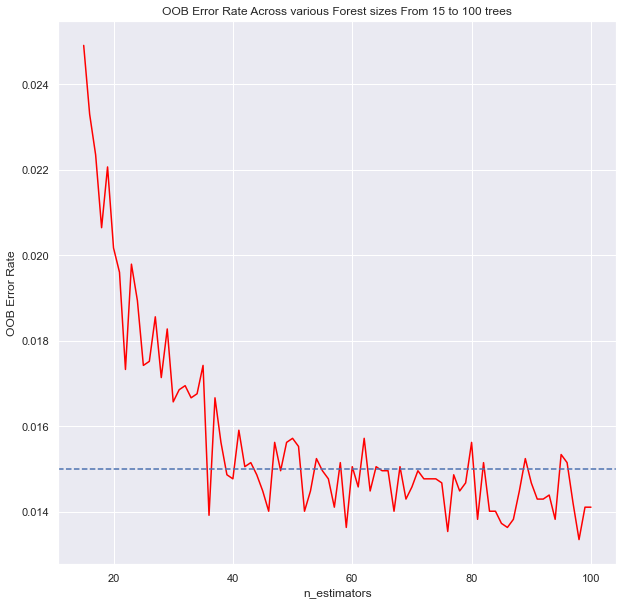

In [138]:
# Line plot to visualize the OOB error rate 

plt.figure(figsize=(10,10))
error_series.plot(kind='line',color='red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes From 15 to 100 trees')
plt.axhline(0.015,linestyle='--')

In [141]:
# Trees with lowest error rate

error_series[39]

0.014870240575866611

In [142]:
# Assigning parameter values to perform grid search to find the best combination of parameters for the model

params = {'max_depth':[10,15,18,20,22,25,28],
          'bootstrap':[True,False],
          'max_features':['auto','sqrt','log2',None],
          'criterion':['gini','entropy']
}
cv = GridSearchCV(rf1,param_grid=params,scoring='accuracy',n_jobs=-1)

In [143]:
# Fitting the training dataset to the cv model to find the best parameters

cv.fit(x_smote,y_smote)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 18, 20, 22, 25, 28],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='accuracy')

In [144]:
# Best parameters

cv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto'}

In [145]:
# Setting the best parameters found using gridsearch CV to the random forest model

rf1.set_params(bootstrap= True,criterion= 'gini', max_depth= 25,max_features= 'auto',n_estimators=39)

RandomForestClassifier(max_depth=25, max_features='auto', n_estimators=39,
                       oob_score=True)

In [146]:
# Fitting the model with the training dataset

rf1.fit(x_smote,y_smote)

RandomForestClassifier(max_depth=25, max_features='auto', n_estimators=39,
                       oob_score=True)

In [147]:
# Training score

rf1.score(x_smote,y_smote)

0.998768706194355

In [148]:
# Prediction using test data

pred_rf1 = rf1.predict(x_test)

In [149]:
# Accuracy score

accuracy_score(y_test,pred_rf1)

0.9523460410557185

In [150]:
# Confusion matrix

cm_rf =confusion_matrix(y_test,pred_rf1)

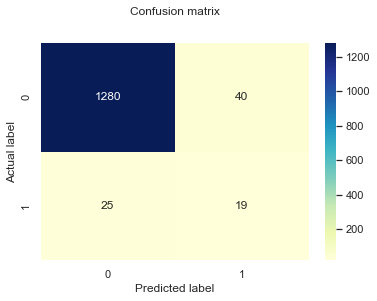

In [151]:
# Plotting confusion matrix using heatmap
# Random Forest Model CORRECTLY predicted 1280 firms 0 as 0 and 19 firms 1 as 1
# Incorrectly predicted 65 firms out of which 25 firms 1 as 0 (FALSE NEGATVE)  & 40 FIRMS 0 as 1 (FALSE POSITIVE)


sns.heatmap(pd.DataFrame(cm_rf),annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

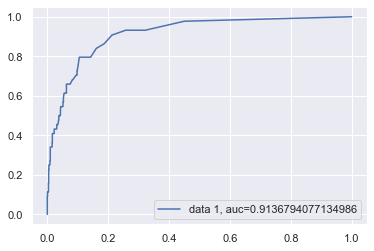

In [152]:
# Plotting auc curve using the prediction probability value
# prediction probability of minority class is taken
# fpr and tpr values are computed using roc_curve method
# auc score is calculated using the probability value and plotted
# 0.9 auc score specifies model is able to predict the positive minority class good 

y_pred_proba_rf1 = rf1.predict_proba(x_test)[::,1] 
fpr_rf1, tpr_rf1, _ = roc_curve(y_test,  y_pred_proba_rf1)
auc_rf1 = roc_auc_score(y_test, y_pred_proba_rf1)
plt.plot(fpr_rf1, tpr_rf1,label="data 1, auc="+str(auc_rf1))
plt.legend(loc=4)
plt.show()

In [153]:
# By tuning the hyper parameter of random forest, we are able to get better recall value for the minority class
# Recall represents how much percent positive class(1) of actual values are predicted correctly(1) 


print(classification_report(y_test,pred_rf1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.32      0.43      0.37        44

    accuracy                           0.95      1364
   macro avg       0.65      0.70      0.67      1364
weighted avg       0.96      0.95      0.96      1364



### Hyper Parameter tuning XGBoost model using SMOTE technique

In [154]:
# Creating xgboost model to tune the hyper parameters

xg = XGBClassifier()

In [155]:
# hyper parameters

params_xg = {'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
          'max_depth':[3,4,5,6,7,8,9,10,12,15],
          'n_estimators': [30,40,50,60,70,80,90,100],
          'min_child_weight':[1,3,5,7],
          'gamma':[0.0,0.1,0.2,0.3,0.4,1,2,3],
          'colsample_bytree':[0.3,0.4,0.5,0.7]
    
}

In [156]:
# Using random search CV to optimize computational power

random_xg = RandomizedSearchCV(estimator=xg,param_distributions=params_xg,cv=5,n_jobs=-1)

In [157]:
# Fitting training data on cv

random_xg.fit(x_smote,y_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 1, 2,
                                                  3],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [30, 40, 50, 60, 70, 80,
                                                         90, 100]})

In [158]:
# Best parameters

random_xg.best_params_

{'n_estimators': 80,
 'min_child_weight': 7,
 'max_depth': 9,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [165]:
# Setting best parameters on xgboost object

xg.set_params(n_estimators= 80,min_child_weight=7, max_depth= 9,learning_rate= 0.3,gamma= 0.2,colsample_bytree= 0.5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [166]:
# fitting training data

xg.fit(x_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [167]:
# Training score

xg.score(x_smote,y_smote)

1.0

In [168]:
# Prediction

pred_xg = xg.predict(x_test)

In [169]:
# Accuracy score

accuracy_score(y_test,pred_xg)

0.9494134897360704

In [170]:
# Confusion matrix


cm_xg=confusion_matrix(y_test,pred_xg)

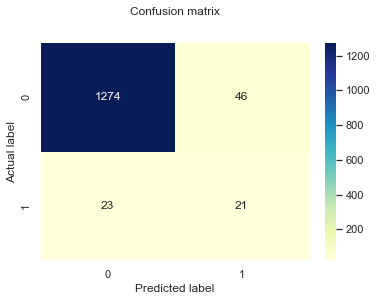

In [171]:
# Plotting confusion matrix using heatmap
# xgboost Model CORRECTLY predicted 1274 firms 0 as 0 and 21 firms 1 as 1
# Incorrectly predicted 67 firms out of which 23 firms 1 as 0 (FALSE NEGATVE)  & 46 FIRMS 0 as 1 (FALSE POSITIVE)

sns.heatmap(pd.DataFrame(cm_xg),annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

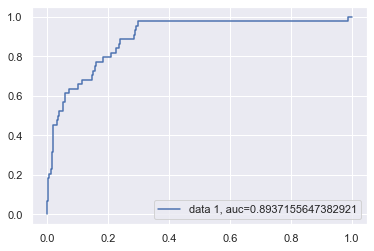

In [172]:
# Plotting auc curve using the prediction probability value
# prediction probability of minority class is taken
# fpr and tpr values are computed using roc_curve method
# auc score is calculated using the probability value and plotted


y_pred_proba_xg = xg.predict_proba(x_test)[::,1]
fpr_xg, tpr_xg, _ = roc_curve(y_test,  y_pred_proba_xg)
auc_xg = roc_auc_score(y_test, y_pred_proba_xg)
plt.plot(fpr_xg, tpr_xg,label="data 1, auc="+str(auc_xg))
plt.legend(loc=4)
plt.show()

In [173]:
# By tuning the hyper parameter of xg boost, we are able to get better recall value for the minority class
# Recall represents how much percent positive class(1) of actual values are predicted correctly(1) 


print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1320
           1       0.31      0.48      0.38        44

    accuracy                           0.95      1364
   macro avg       0.65      0.72      0.68      1364
weighted avg       0.96      0.95      0.95      1364



### Hyper parameter tuning XGboost Model using Borderline SMOTE technique

In [174]:
# Creating xgboost model and applying random search CV to find the best parameters using borderline smote technique

xg1 = XGBClassifier()
random_xg1 = RandomizedSearchCV(estimator=xg1,param_distributions=params_xg,cv=5,n_jobs=-1)
random_xg1.fit(x_border,y_border)
random_xg1.best_params_

{'n_estimators': 90,
 'min_child_weight': 5,
 'max_depth': 9,
 'learning_rate': 0.15,
 'gamma': 2,
 'colsample_bytree': 0.5}

In [175]:
# Setting best parameters to the xg boost model

xg1.set_params(n_estimators= 90,min_child_weight=5, max_depth= 9,learning_rate= 0.15,gamma= 2,colsample_bytree= 0.5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [176]:
# Fitting the training data

xg1.fit(x_border,y_border)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [177]:
# Training score

xg1.score(x_border,y_border)

0.9999052850918735

In [178]:
# Prediction

pred_xg1 = xg1.predict(x_test)

In [179]:
# Testing score

accuracy_score(y_test,pred_xg1)

0.9552785923753666

In [180]:
cm_xg1 = confusion_matrix(y_test,pred_xg1)

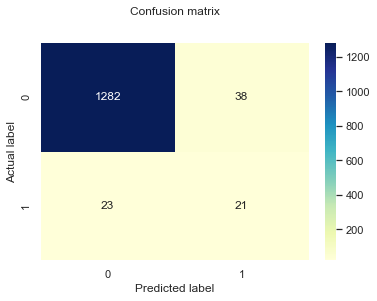

In [181]:
# Plotting confusion matrix using heatmap
# xgboost Model CORRECTLY predicted 1282 firms 0 as 0 and 21 firms 1 as 1
# Incorrectly predicted 61 firms out of which 23 firms 1 as 0 (FALSE NEGATVE)  & 38 FIRMS 0 as 1 (FALSE POSITIVE)

sns.heatmap(pd.DataFrame(cm_xg1),annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

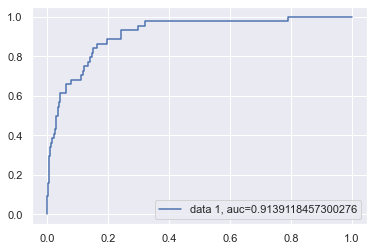

In [182]:
# Plotting auc curve using the prediction probability value
# prediction probability of minority class is taken
# fpr and tpr values are computed using roc_curve method
# auc score is calculated using the probability value and plotted


y_pred_proba_xg1 = xg1.predict_proba(x_test)[::,1]
fpr_xg1, tpr_xg1, _ = roc_curve(y_test,  y_pred_proba_xg1)
auc_xg1 = roc_auc_score(y_test, y_pred_proba_xg1)
plt.plot(fpr_xg1, tpr_xg1,label="data 1, auc="+str(auc_xg1))
plt.legend(loc=4)
plt.show()

In [183]:
# Classification report

print(classification_report(y_test,pred_xg1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.36      0.48      0.41        44

    accuracy                           0.96      1364
   macro avg       0.67      0.72      0.69      1364
weighted avg       0.96      0.96      0.96      1364



### Hyper Parameter tuning of Adaboost using SMOTE technique

In [184]:
# Creating ada boost model

ada = AdaBoostClassifier()

In [189]:
# Listing the parameters for tuning

params_ada = {
    'n_estimators': [30,50,60,70,80,100,120,130,140,150],
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],  
      
}

In [190]:
# Using random search CV to tune the parameters

random_ada = RandomizedSearchCV(estimator=ada,param_distributions=params_ada,cv=5,n_jobs=-1) 

In [191]:
# Fitting data on random search CV

random_ada.fit(x_smote,y_smote)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35,
                                                          0.4],
                                        'n_estimators': [30, 50, 60, 70, 80,
                                                         100, 120, 130, 140,
                                                         150]})

In [192]:
# Finding best parameters

random_ada.best_params_

{'n_estimators': 130, 'learning_rate': 0.4}

In [193]:
# Setting best parameters on ada boost model

ada.set_params(n_estimators= 130, learning_rate= 0.4,)

AdaBoostClassifier(learning_rate=0.4, n_estimators=130)

In [194]:
# Fitting the training data

ada.fit(x_smote,y_smote)

AdaBoostClassifier(learning_rate=0.4, n_estimators=130)

In [195]:
# Training score

ada.score(x_smote,y_smote)

0.9644819094525479

In [196]:
# Predictions

pred_ada = ada.predict(x_test)

In [197]:
# Testing score

accuracy_score(y_test,pred_ada)

0.9186217008797654

In [198]:
# Confusion matrix

cm_ada = confusion_matrix(y_test,pred_ada)

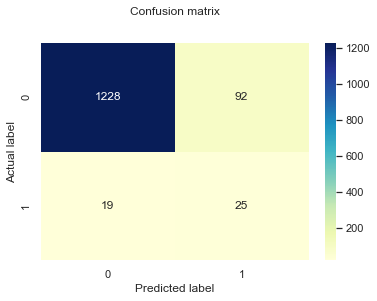

In [199]:
# Plotting confusion matrix using heatmap
# xgboost Model CORRECTLY predicted 1228 firms 0 as 0 and 25 firms 1 as 1
# Incorrectly predicted 111 firms out of which 19 firms 1 as 0 (FALSE NEGATVE)  & 92 FIRMS 0 as 1 (FALSE POSITIVE)

sns.heatmap(pd.DataFrame(cm_ada),annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


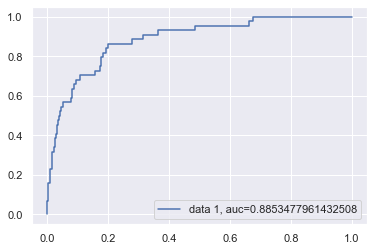

In [200]:
# Plotting auc curve using the prediction probability value
# prediction probability of minority class is taken
# fpr and tpr values are computed using roc_curve method
# auc score is calculated using the probability value and plotted
# 0.9 auc score specifies model is able to predict the positive minority class good


y_pred_proba_ada = ada.predict_proba(x_test)[::,1]
fpr_ada, tpr_ada, _ = roc_curve(y_test,  y_pred_proba_ada)
auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
plt.plot(fpr_ada,tpr_ada,label="data 1, auc="+str(auc_ada))
plt.legend(loc=4)
plt.show()

In [201]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1320
           1       0.21      0.57      0.31        44

    accuracy                           0.92      1364
   macro avg       0.60      0.75      0.63      1364
weighted avg       0.96      0.92      0.94      1364



### Hyper Parameter tuning of Adaboost using Borderline SMOTE technique

In [202]:
# Creating ada boost model

ada1 = AdaBoostClassifier()

In [203]:
# Listing the parameters for tuning

params_ada1 = {
    'n_estimators': [60,70,80,100,110,130,150,180],
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.40],  
      
}

In [204]:
# Using random search CV to tune the parameters

random_ada1 = RandomizedSearchCV(estimator=ada1,param_distributions=params_ada1,cv=5,n_jobs=-1) 

In [205]:
# Fitting data on random search CV

random_ada1.fit(x_border,y_border)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35,
                                                          0.4],
                                        'n_estimators': [60, 70, 80, 100, 110,
                                                         130, 150, 180]})

In [206]:
# Finding best parameters

random_ada1.best_params_

{'n_estimators': 150, 'learning_rate': 0.35}

In [207]:
# Setting best parameters on ada boost model

ada1.set_params(n_estimators=150 , learning_rate=0.35 ,)

AdaBoostClassifier(learning_rate=0.35, n_estimators=150)

In [208]:
# Fitting the training data

ada1.fit(x_border,y_border)

AdaBoostClassifier(learning_rate=0.35, n_estimators=150)

In [209]:
# Training score

ada1.score(x_border,y_border)

0.969785944307634

In [210]:
# Predictions

pred_ada1 = ada1.predict(x_test)

In [211]:
# Testing score

accuracy_score(y_test,pred_ada1)

0.9252199413489736

In [212]:
# Confusion matrix

cm_ada1 = confusion_matrix(y_test,pred_ada1)

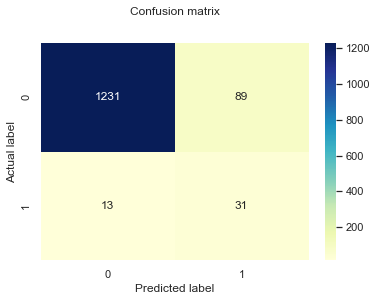

In [213]:
# Plotting confusion matrix using heatmap
# xgboost Model CORRECTLY predicted 1231 firms 0 as 0 and 31 firms 1 as 1
# Incorrectly predicted 102 firms out of which 13 firms 1 as 0 (FALSE NEGATVE)  & 89 FIRMS 0 as 1 (FALSE POSITIVE)

sns.heatmap(pd.DataFrame(cm_ada1),annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


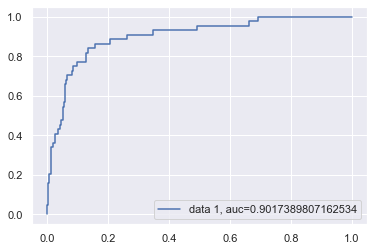

In [214]:
# Plotting auc curve using the prediction probability value
# prediction probability of minority class is taken
# fpr and tpr values are computed using roc_curve method
# auc score is calculated using the probability value and plotted
# 0.9 auc score specifies model is able to predict the positive minority class good


y_pred_proba_ada1 = ada1.predict_proba(x_test)[::,1]
fpr_ada1, tpr_ada1, _ = roc_curve(y_test,  y_pred_proba_ada1)
auc_ada1 = roc_auc_score(y_test, y_pred_proba_ada1)
plt.plot(fpr_ada1,tpr_ada1,label="data 1, auc="+str(auc_ada1))
plt.legend(loc=4)
plt.show()

In [215]:
print(classification_report(y_test,pred_ada1))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.26      0.70      0.38        44

    accuracy                           0.93      1364
   macro avg       0.62      0.82      0.67      1364
weighted avg       0.97      0.93      0.94      1364



In [140]:
# By analyzing all the models. It is evident that Adaboost model with Borderline SMOTE technique outperforms all other
# models in terms of predicting the minority class,high recall,f1 score and auc score.

# We can use the adaboost model with Borderline SMOTE technique for Bankruptcy prediction analysis